# Lecture 14: Visualization

In [1]:
import numpy as np
import pandas as pd
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 80
pd.options.display.max_columns = 20
np.random.seed(12345)
import matplotlib.pyplot as plt
import matplotlib
plt.rc("figure", figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

信息可视化（也叫绘图）是数据分析中最重要的工作之一。它可能是数据预处理的一部分。例如，帮助我们找出异常值、必要的数据转换、得出有关模型的idea等。另外，做一个可交互的数据可视化通常是我们的最终目标。Python有许多库进行静态或动态的数据可视化，但我们这里主要关注于matplotlib（http://matplotlib.org/）和基于它的库。

matplotlib是一个用于创建出版质量图表的桌面绘图包（主要是2D方面）。该项目是由John Hunter于2002年启动的，其目的是为Python构建一个MATLAB式的绘图接口。matplotlib和IPython社区进行合作，简化了从IPython shell（包括现在的Jupyter notebook）进行交互式绘图。matplotlib支持各种操作系统上许多不同的GUI后端，而且还能将图片导出为各种常见的矢量（vector）和光栅（raster）图：PDF、SVG、JPG、PNG、BMP、GIF等。

随着时间的发展，matplotlib衍生出了多个数据可视化的工具集，它们使用matplotlib作为底层。其中之一是seaborn（http://seaborn.pydata.org/），本章后面会学习它。

## 1 matplotlib API入门
matplotlib的通常引入约定是：

When using the 'inline' backend, your matplotlib graphs will be included in your notebook, next to the code.

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

创建一个简单的图形。

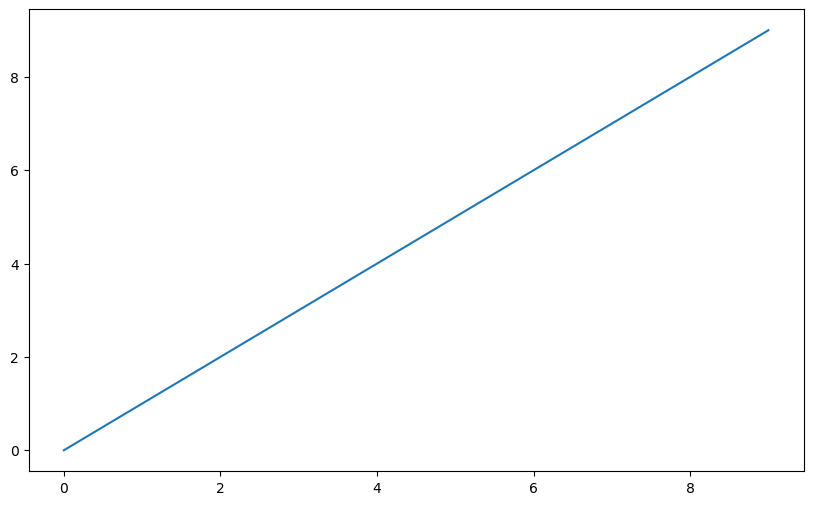

In [4]:
plt.plot(data)

### Figure和Subplot
matplotlib的图像都位于Figure对象中。你可以用plt.figure创建一个新的Figure：

In [5]:
fig = plt.figure()

<Figure size 1000x600 with 0 Axes>

如果用的是IPython，这时会弹出一个空窗口，但在Jupyter中，必须再输入更多命令才能看到。plt.figure有一些选项，特别是figsize，它用于确保当图片保存到磁盘时具有一定的大小和纵横比。

不能通过空Figure绘图。可以用add_subplot创建一个或多个subplot才行：

这条代码的意思是：图像应该是2×2的（即最多4张图），且当前选中的是4个subplot中的第一个（编号从1开始）。接下来我们再把后面两个subplot也创建出来。

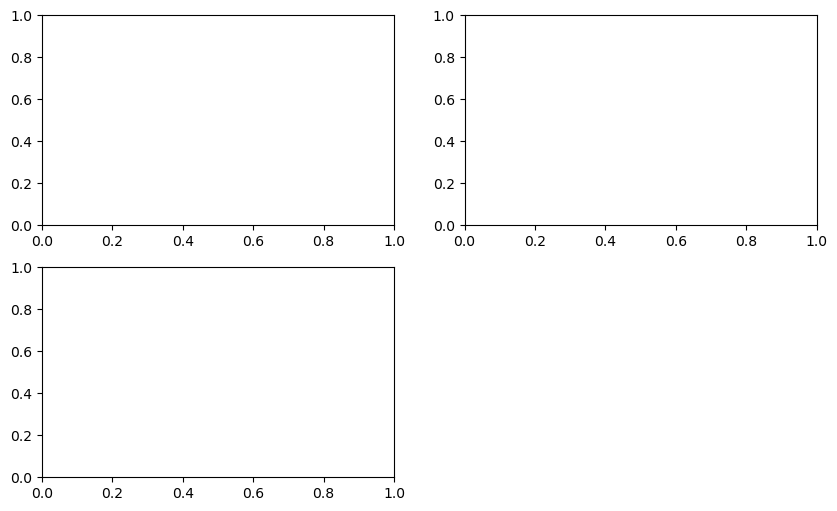

In [6]:
# By default, the inline backend closes a figure after a cell has been fully executed.
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

如果这时执行一条绘图命令（如plt.plot([1.5, 3.5, -2, 1.6])），matplotlib就会在最后一个用过的subplot（如果没有则创建一个）上进行绘制，隐藏创建figure和subplot的过程。因此，如果我们执行下列命令，你就会得到如图所示的结果：

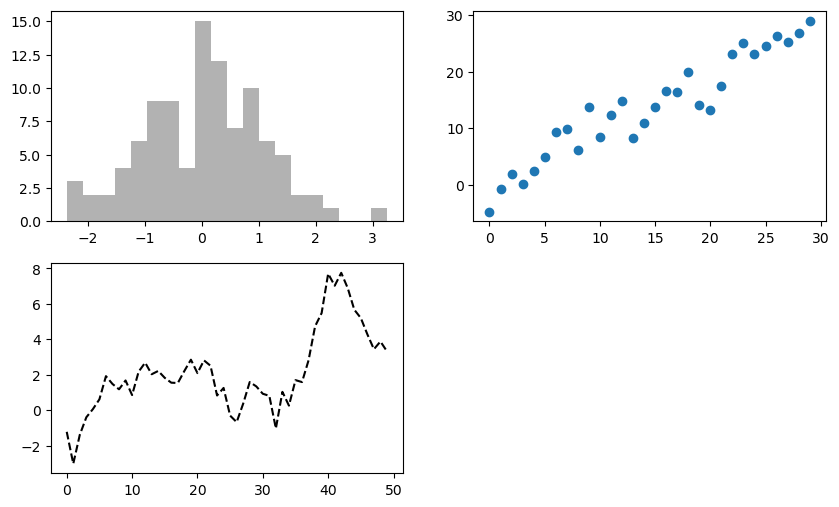

In [7]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

ax1.hist(np.random.standard_normal(100), bins=20, color="black", alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.standard_normal(30))
ax3.plot(np.random.randn(50).cumsum(), color="black", linestyle="dashed")

"k--"是一个线型选项，用于告诉matplotlib绘制黑色虚线图。

创建包含subplot网格的figure是一个非常常见的任务，matplotlib有一个更为方便的方法plt.subplots，它可以创建一个新的Figure，并返回一个含有已创建的subplot对象的NumPy数组：

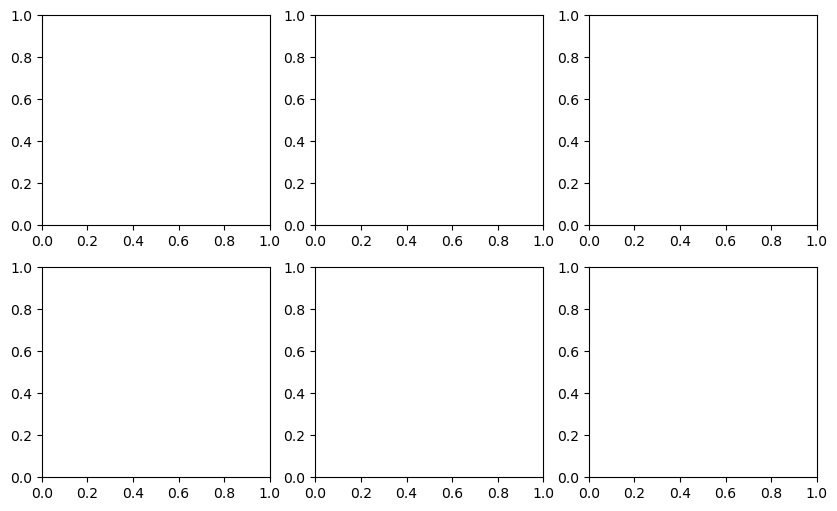

In [8]:
fig, axes = plt.subplots(2, 3)

In [9]:
axes

array([[<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

这是非常实用的，因为可以轻松地对axes数组进行索引，就好像是一个二维数组一样，例如axes[0,1]。你还可以通过sharex和sharey指定subplot应该具有相同的X轴或Y轴。在比较相同范围的数据时，这也是非常实用的，否则，matplotlib会自动缩放各图表的界限。有关该方法的更多信息，请参见下表。
![figure_axes](./figures/figure_axes.webp)

### 调整subplot周围的间距
默认情况下，matplotlib会在subplot外围留下一定的边距，并在subplot之间留下一定的间距。间距跟图像的高度和宽度有关，因此，如果你调整了图像大小（不管是编程还是手工），间距也会自动调整。利用Figure的subplots_adjust方法可以轻而易举地修改间距：

In [10]:
fig.subplots_adjust(left=None, bottom=None, right=None, top=None,
                    wspace=None, hspace=None)

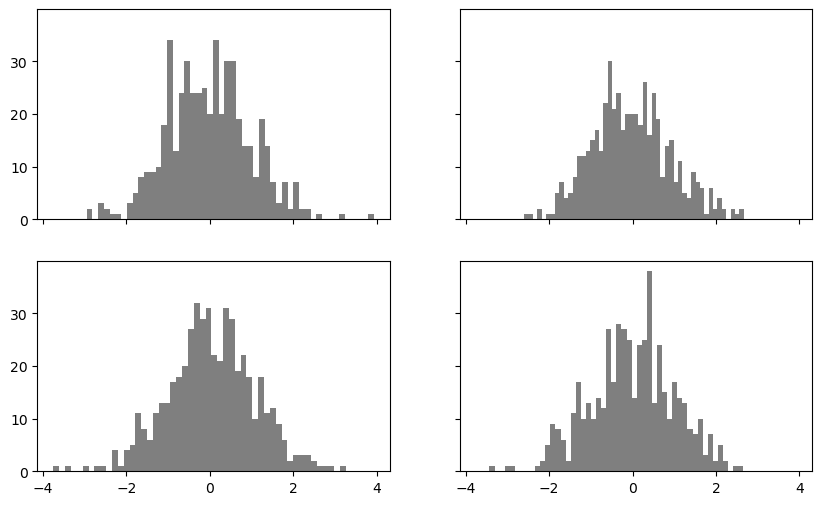

In [11]:
# 修改前
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50,
                        color="black", alpha=0.5)

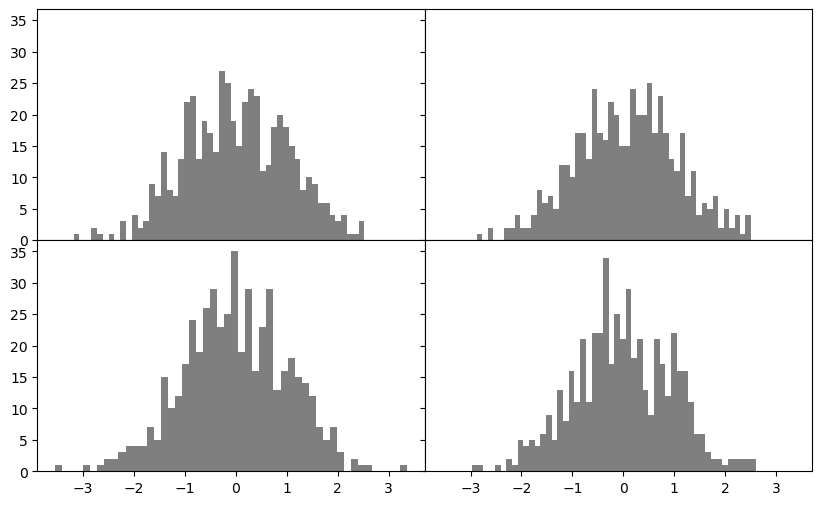

In [12]:
# 修改后
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50,
                        color="black", alpha=0.5)
fig.subplots_adjust(wspace=0, hspace=0)

### 颜色、标记和线型
matplotlib的plot函数接受一组X和Y坐标，还可以接受一个表示颜色和线型的字符串缩写。例如，要根据x和y绘制绿色虚线，你可以执行如下代码：

`ax.plot(x, y, 'g--')`

这种在一个字符串中指定颜色和线型的方式非常方便。在实际中，如果你是用代码绘图，你可能不想通过处理字符串来获得想要的格式。通过下面这种更为明确的方式也能得到同样的效果：

`ax.plot(x, y, linestyle='--', color='g')`

更多线型选项，参考：https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

线图可以使用标记强调数据点。因为matplotlib可以创建连续线图，在点之间进行插值，因此有时可能不太容易看出真实数据点的位置。标记也可以放到格式字符串中，但标记类型和线型必须放在颜色后面:

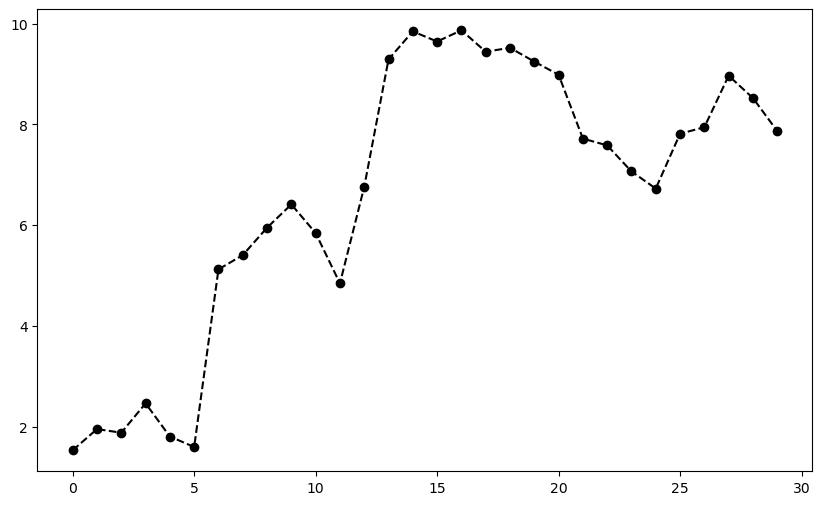

In [13]:
plt.plot(np.random.randn(30).cumsum(), 'ko--');

还可以将其写成更为明确的形式：

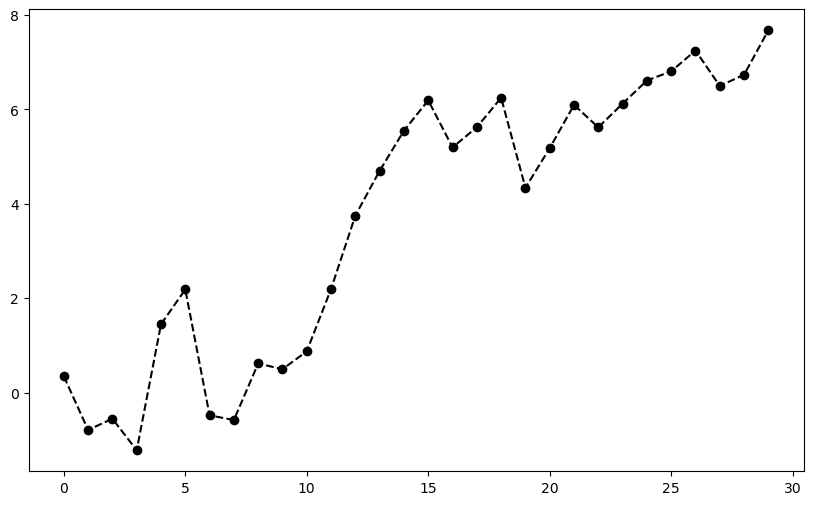

In [14]:
plt.plot(np.random.randn(30).cumsum(), color='black', linestyle='dashed', marker='o');

在线型图中，非实际数据点默认是按线性方式插值的。可以通过drawstyle选项修改:

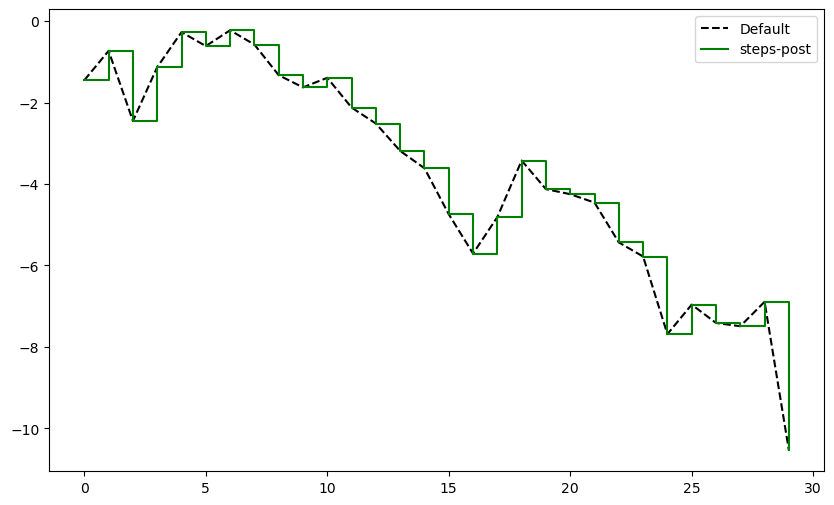

In [15]:
fig = plt.figure()
ax = fig.add_subplot()
data = np.random.standard_normal(30).cumsum()
ax.plot(data, color="black", linestyle="dashed", label="Default");
ax.plot(data, color="green", linestyle="-", drawstyle="steps-post", label="steps-post");
ax.legend()

你可能注意到运行上面代码时有输出<matplotlib.lines.Line2D at ...>。matplotlib会返回引用了新添加的子组件的对象。大多数时候，你可以放心地忽略这些输出。这里，因为我们传递了label参数到plot，我们可以创建一个plot图例，指明每条使用plt.legend的线。

### 刻度、标签和图例
对于大多数的图表装饰项，其主要实现方式有二：使用过程型的pyplot接口（例如，matplotlib.pyplot）以及更为面向对象的原生matplotlib API。

pyplot接口的设计目的就是交互式使用，含有诸如xlim、xticks和xticklabels之类的方法。它们分别控制图表的范围、刻度位置、刻度标签等。其使用方式有以下两种：

* 调用时不带参数，则返回当前的参数值（例如，plt.xlim()返回当前的X轴绘图范围）。
* 调用时带参数，则设置参数值（例如，plt.xlim([0,10])会将X轴的范围设置为0到10）。
所有这些方法都是对当前或最近创建的AxesSubplot起作用的。它们各自对应subplot对象上的两个方法，以xlim为例，就是ax.get_xlim和ax.set_xlim。我更喜欢使用subplot的实例方法（因为我喜欢明确的事情，而且在处理多个subplot时这样也更清楚一些）。当然你完全可以选择自己觉得方便的那个。

### 设置标题、轴标签、刻度以及刻度标签
为了说明自定义轴，我将创建一个简单的图像并绘制一段随机漫步

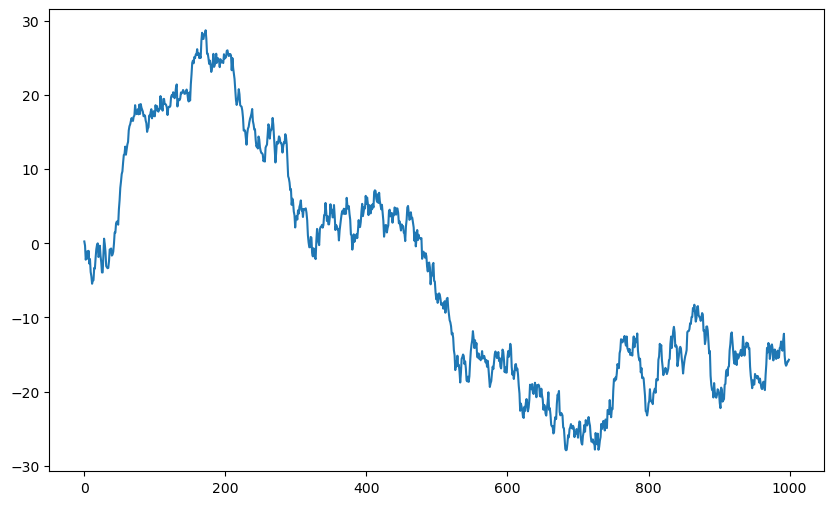

In [16]:
fig, ax = plt.subplots()
ax.plot(np.random.standard_normal(1000).cumsum());

要改变x轴刻度，最简单的办法是使用set_xticks和set_xticklabels。前者告诉matplotlib要将刻度放在数据范围中的哪些位置，默认情况下，这些位置也就是刻度标签。但我们可以通过set_xticklabels将任何其他的值用作标签。

rotation选项设定x刻度标签倾斜30度。最后，再用set_xlabel为X轴设置一个名称，并用set_title设置一个标题：

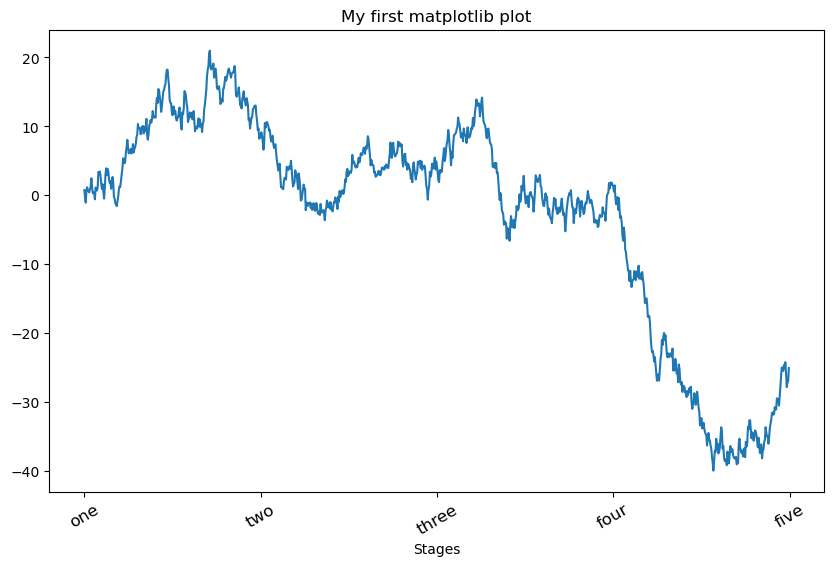

In [17]:
fig, ax = plt.subplots()
ax.plot(np.random.standard_normal(1000).cumsum())

ax.set_xticks([0, 250, 500, 750, 1000])
ax.set_xticklabels(["one", "two", "three", "four", "five"], rotation=30, fontsize=12)
ax.set_xlabel("Stages")
ax.set_title("My first matplotlib plot");

Y轴的修改方式与此类似，只需将上述代码中的x替换为y即可。轴的类有集合方法，可以批量设定绘图选项。前面的例子，也可以写为：

In [18]:
props = {
    'title': 'My first matplotlib plot',
    'xlabel': 'Stages'
}
ax.set(**props)

[Text(0.5, 1.0, 'My first matplotlib plot'),
 Text(0.5, 23.999999999999986, 'Stages')]

### 添加图例
图例（legend）是另一种用于标识图表元素的重要工具。添加图例的方式有多种。最简单的是在添加subplot的时候传入label参数：

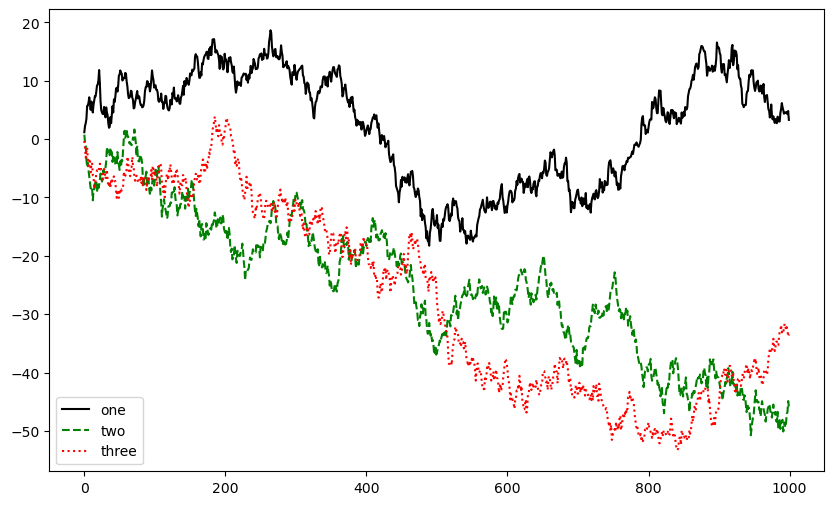

In [19]:
fig, ax = plt.subplots()
ax.plot(np.random.randn(1000).cumsum(), color="k", label="one");
ax.plot(np.random.randn(1000).cumsum(), color="g", linestyle="dashed",
        label="two");
ax.plot(np.random.randn(1000).cumsum(), color="r", linestyle="dotted",
        label="three");

# 然后通过调用ax.legend()或plt.legend()来自动创建图例
ax.legend();

legend方法有几个其它的loc位置参数选项。请查看文档字符串（使用ax.legend?）。

loc告诉matplotlib要将图例放在哪。如果你不是吹毛求疵的话，"best"是不错的选择，因为它会选择最不碍事的位置。要从图例中去除一个或多个元素，不传入label或传入label='nolegend'即可。

### 注解以及在Subplot上绘图
除标准的绘图类型，你可能还希望绘制一些子集的注解，可能是文本、箭头或其他图形等。注解和文字可以通过text、arrow和annotate函数进行添加。text可以将文本绘制在图表的指定坐标(x,y)，还可以加上一些自定义格式：

`ax.text(x, y, 'Hello world!', family='monospace', fontsize=10)`

注解中可以既含有文本也含有箭头。例如，我们根据最近的标准普尔500指数价格（来自Yahoo!Finance）绘制一张曲线图，并标出2008年到2009年金融危机期间的一些重要日期。

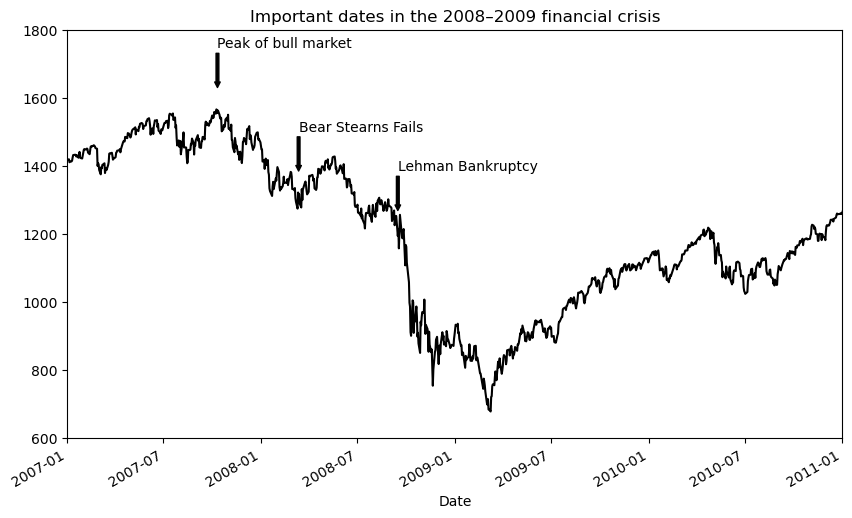

In [20]:
from datetime import datetime

fig, ax = plt.subplots()

data = pd.read_csv("examples/spx.csv", index_col=0, parse_dates=True)
spx = data["SPX"]

spx.plot(ax=ax, color="black")

crisis_data = [
    (datetime(2007, 10, 11), "Peak of bull market"),
    (datetime(2008, 3, 12), "Bear Stearns Fails"),
    (datetime(2008, 9, 15), "Lehman Bankruptcy")
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor="black", headwidth=4, width=2,
                                headlength=4),
                horizontalalignment="left", verticalalignment="top")

# Zoom in on 2007-2010
ax.set_xlim(["1/1/2007", "1/1/2011"])
ax.set_ylim([600, 1800])

ax.set_title("Important dates in the 2008–2009 financial crisis");

这张图中有几个重要的点要强调：ax.annotate方法可以在指定的x和y坐标轴绘制标签。我们使用set_xlim和set_ylim人工设定起始和结束边界，而不使用matplotlib的默认方法。最后，用ax.set_title添加图标标题。

更多有关注解的示例，请访问matplotlib的在线示例库。

图形的绘制要麻烦一些。matplotlib有一些表示常见图形的对象。这些对象被称为块（patch）。其中有些（如Rectangle和Circle），可以在matplotlib.pyplot中找到，但完整集合位于matplotlib.patches。

要在图表中添加一个图形，你需要创建一个块对象shp，然后通过ax.add_patch(shp)将其添加到subplot中.

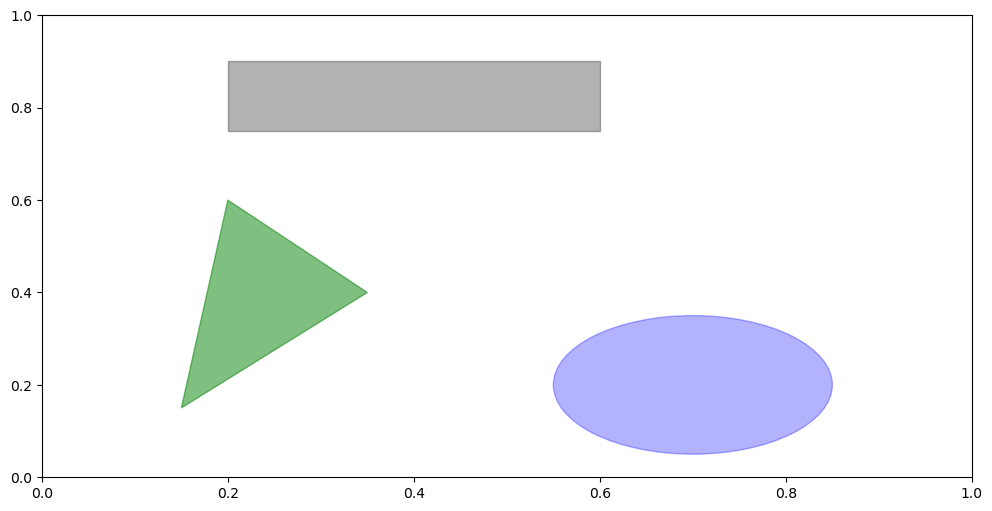

In [21]:
fig, ax = plt.subplots(figsize=(12, 6))
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color="black", alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color="blue", alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color="green", alpha=0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon);

### 将图表保存到文件
利用plt.savefig可以将当前图表保存到文件。该方法相当于Figure对象的实例方法savefig。例如，要将图表保存为SVG文件，你只需输入：

`plt.savefig('figpath.svg')`

文件类型是通过文件扩展名推断出来的。因此，如果你使用的是.pdf，就会得到一个PDF文件。我在发布图片时最常用到两个重要的选项是dpi（控制“每英寸点数”分辨率）和bbox_inches（可以剪除当前图表周围的空白部分）。要得到一张带有最小白边且分辨率为400DPI的PNG图片，你可以:

`plt.savefig('figpath.png', dpi=400, bbox_inches='tight')`

## 2 使用pandas和seaborn绘图
matplotlib实际上是一种比较低级的工具。要绘制一张图表，你组装一些基本组件就行：数据展示（即图表类型：线型图、柱状图、盒形图、散布图、等值线图等）、图例、标题、刻度标签以及其他注解型信息。

在pandas中，我们有多列数据，还有行和列标签。pandas自身就有内置的方法，用于简化从DataFrame和Series绘制图形。另一个库seaborn（https://seaborn.pydata.org/），由Michael Waskom创建的静态图形库。Seaborn简化了许多常见可视类型的创建。

提示：引入seaborn会修改matplotlib默认的颜色方案和绘图类型，以提高可读性和美观度。即使你不使用seaborn API，你可能也会引入seaborn，作为提高美观度和绘制常见matplotlib图形的简化方法。

### 线型图
Series和DataFrame都有一个用于生成各类图表的plot方法。默认情况下，它们所生成的是线型图：

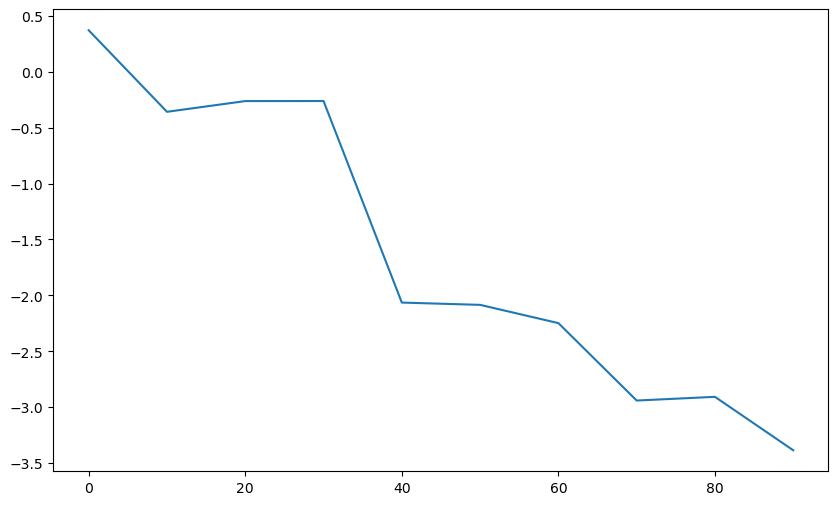

In [22]:
s = pd.Series(np.random.standard_normal(10).cumsum(), index=np.arange(0, 100, 10))
s.plot();

该Series对象的索引会被传给matplotlib，并用以绘制X轴。可以通过use_index=False禁用该功能。X轴的刻度和界限可以通过xticks和xlim选项进行调节，Y轴就用yticks和ylim。plot参数的完整列表请参见表9-3。我只会讲解其中几个，剩下的就留给读者自己去研究了。

![seaborn_plot1](./figures/seaborn_plot1.webp)
![seaborn_plot2](./figures/seaborn_plot2.webp)

pandas的大部分绘图方法都有一个可选的ax参数，它可以是一个matplotlib的subplot对象。这使你能够在网格布局中更为灵活地处理subplot的位置。

DataFrame的plot方法会在一个subplot中为各列绘制一条线，并自动创建图例：

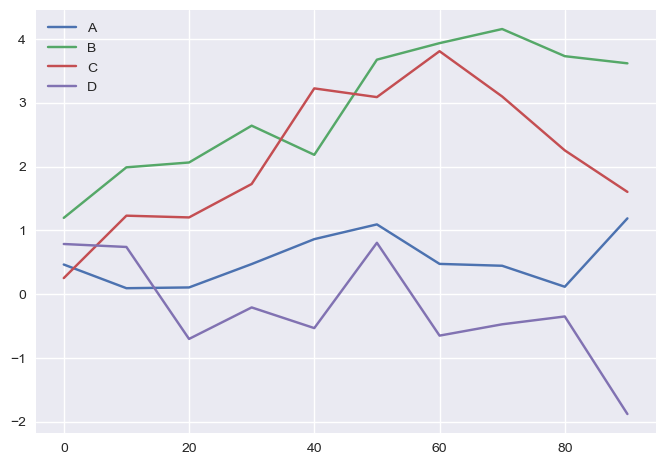

In [23]:
df = pd.DataFrame(np.random.standard_normal((10, 4)).cumsum(0),
                  columns=["A", "B", "C", "D"],
                  index=np.arange(0, 100, 10))
plt.style.use('seaborn-v0_8')
df.plot();

In [24]:
# 查看所有可用的样式
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

### 柱状图
plot.bar()和plot.barh()分别绘制水平和垂直的柱状图。这时，Series和DataFrame的索引将会被用作X（bar）或Y（barh）刻度：

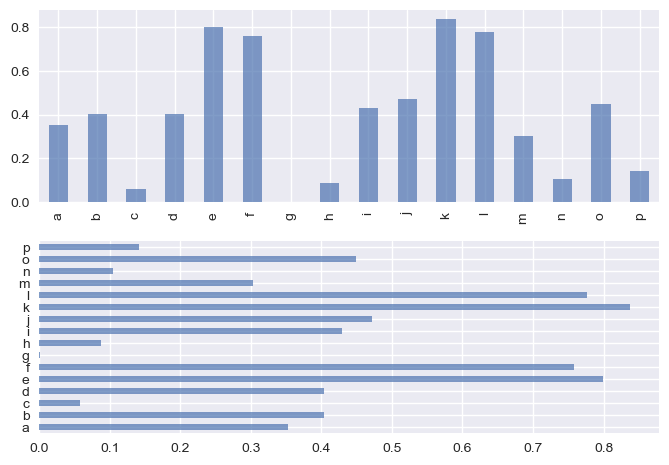

In [25]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.uniform(size=16), index=list("abcdefghijklmnop"))
data.plot.bar(ax=axes[0], alpha=0.7) # color="k", 
data.plot.barh(ax=axes[1], alpha=0.7); # color="k", 

color='k'和alpha=0.7设定了图形的颜色为黑色，并使用部分的填充透明度。对于DataFrame，柱状图会将每一行的值分为一组，并排显示：

In [26]:
np.random.seed(12348)

In [27]:
df = pd.DataFrame(np.random.uniform(size=(6, 4)),
                  index=["one", "two", "three", "four", "five", "six"],
                  columns=pd.Index(["A", "B", "C", "D"], name="Genus"))
df

Genus,A,B,C,D
one,0.370670,0.602792,0.229159,0.486744
two,0.420082,0.571653,0.049024,0.880592
three,0.814568,0.277160,0.880316,0.431326
four,0.374020,0.899420,0.460304,0.100843
five,0.433270,0.125107,0.494675,0.961825
six,0.601648,0.478576,0.205690,0.560547


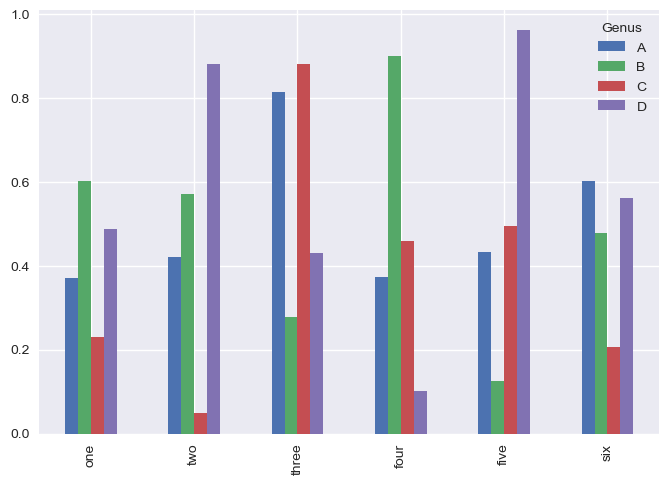

In [28]:
df.plot.bar();

注意，DataFrame各列的名称"Genus"被用作了图例的标题。

设置stacked=True即可为DataFrame生成堆积柱状图，这样每行的值就会被堆积在一起:

<Axes: >

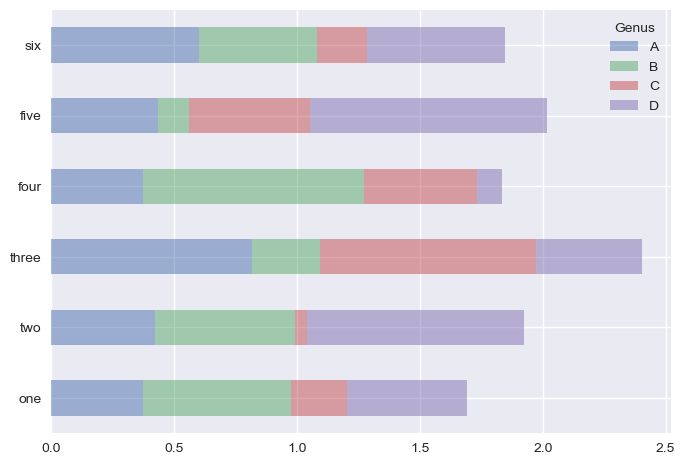

In [29]:
df.plot.barh(stacked=True, alpha=0.5)

再以前面用过的那个有关小费的数据集为例，假设我们想要做一张堆积柱状图以展示每天各种聚会规模的数据点的百分比。我用read_csv将数据加载进来，然后根据日期和聚会规模创建一张交叉表：

In [30]:
tips = pd.read_csv("examples/tips.csv")
party_counts = pd.crosstab(tips["day"], tips["size"])
party_counts = party_counts.reindex(index=["Thur", "Fri", "Sat", "Sun"])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Thur,1,48,4,5,1,3
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1


In [31]:
party_counts = party_counts.loc[:, 2:5]

# Normalize to sum to 1
party_pcts = party_counts.div(party_counts.sum(axis="columns"),
                              axis="index")
party_pcts

size,2,3,4,5
day,,,,
Thur,0.827586,0.068966,0.086207,0.017241
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000


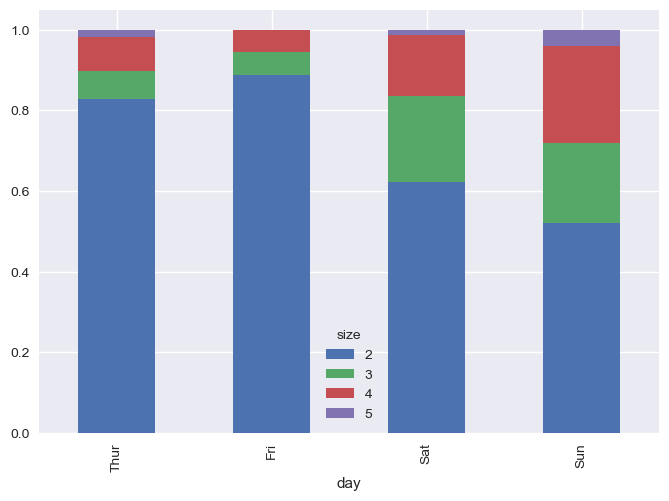

In [32]:
party_pcts.plot.bar(stacked=True);

于是，通过该数据集就可以看出，聚会规模在周末会变大。

对于在绘制一个图形之前，需要进行合计的数据，使用seaborn可以减少工作量。用seaborn来看每天的小费比例：

In [33]:
import seaborn as sns

tips["tip_pct"] = tips["tip"] / (tips["total_bill"] - tips["tip"])
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


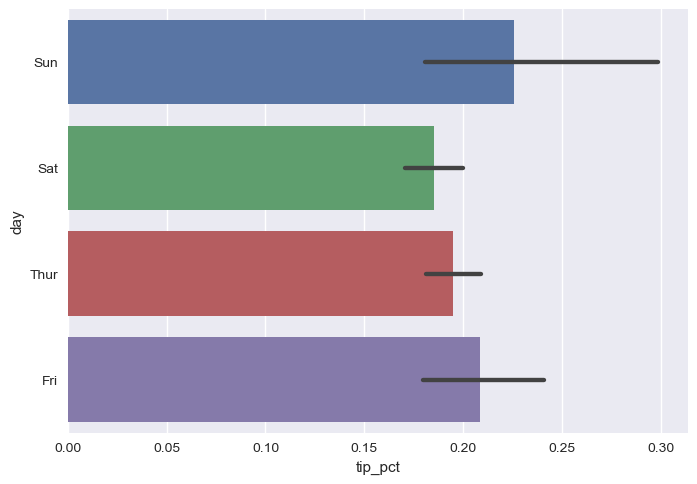

In [34]:
sns.barplot(x="tip_pct", y="day", data=tips, orient="h");

seaborn的绘制函数使用data参数，它可能是pandas的DataFrame。其它的参数是关于列的名字。因为一天的每个值有多次观察，柱状图的值是tip_pct的平均值。绘制在柱状图上的黑线代表95%置信区间（可以通过可选参数配置）。

seaborn.barplot有颜色选项，使我们能够通过一个额外的值设置：

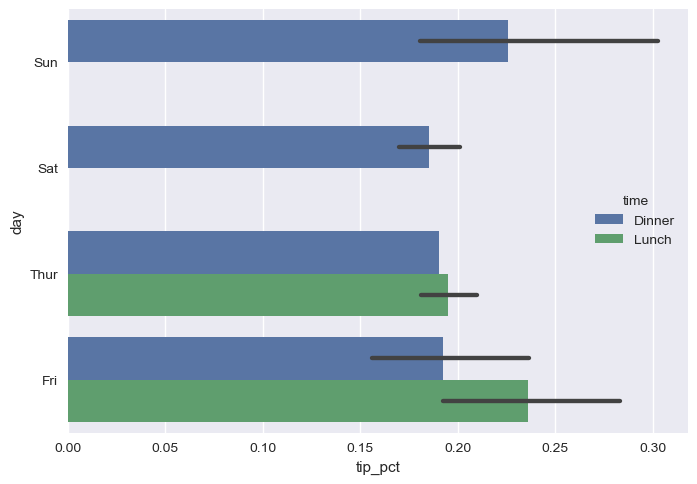

In [35]:
sns.barplot(x="tip_pct", y="day", hue="time", data=tips, orient="h");

注意，seaborn已经自动修改了图形的美观度：默认调色板，图形背景和网格线的颜色。你可以用seaborn.set在不同的图形外观之间切换：

In [36]:
# There are five preset seaborn themes: darkgrid, whitegrid, dark, white, and ticks.
sns.set_style("whitegrid")

直方图（histogram）是一种可以对值频率进行离散化显示的柱状图。数据点被拆分到离散的、间隔均匀的面元中，绘制的是各面元中数据点的数量。再以前面那个小费数据为例，通过在Series使用plot.hist方法，我们可以生成一张“小费占消费总额百分比”的直方图:

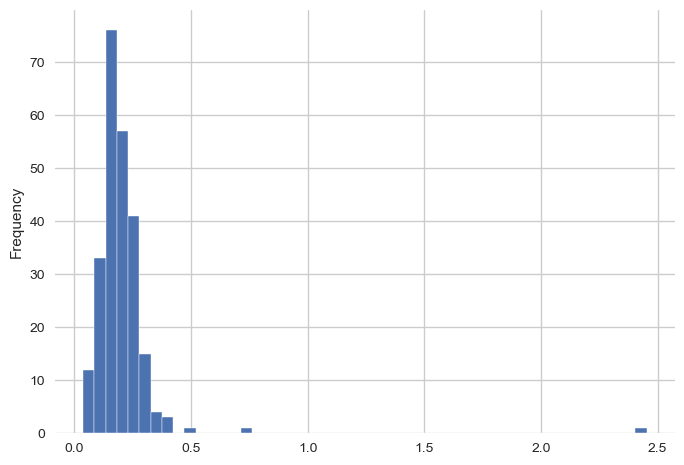

In [37]:
tips["tip_pct"].plot.hist(bins=50);

与此相关的一种图表类型是密度图，它是通过计算“可能会产生观测数据的连续概率分布的估计”而产生的。一般的过程是将该分布近似为一组核（即诸如正态分布之类的较为简单的分布）。因此，密度图也被称作KDE（Kernel Density Estimate，核密度估计）图。使用plot.kde和标准混合正态分布估计即可生成一张密度图:

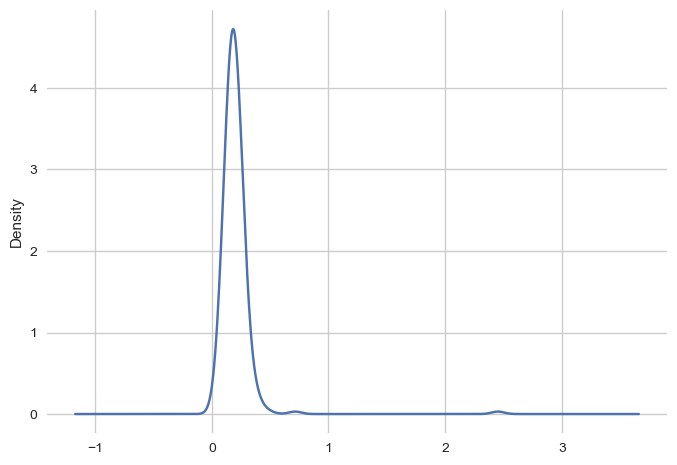

In [38]:
tips["tip_pct"].plot.density();

seaborn的distplot方法绘制直方图和密度图更加简单，还可以同时画出直方图和连续密度估计图。作为例子，考虑一个双峰分布，由两个不同的标准正态分布组成:

/var/folders/k1/s9qmqx2s2vbg06drtxvk01s40000gn/T/ipykernel_5366/126865223.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(values, bins=100, color="black");
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


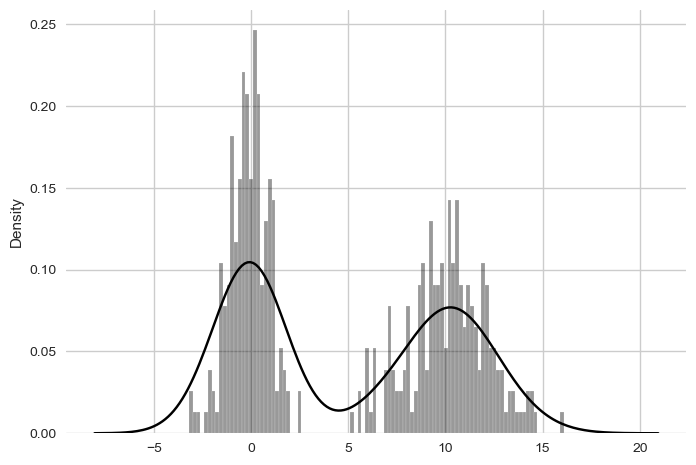

In [39]:
comp1 = np.random.standard_normal(200)
comp2 = 10 + 2 * np.random.standard_normal(200)
values = pd.Series(np.concatenate([comp1, comp2]))

sns.distplot(values, bins=100, color="black");

### 散布图或点图
点图或散布图是观察两个一维数据序列之间的关系的有效手段。在下面这个例子中，我加载了来自statsmodels项目的macrodata数据集，选择了几个变量，然后计算对数差：

In [40]:
macro = pd.read_csv("examples/macrodata.csv")
data = macro[["cpi", "m1", "tbilrate", "unemp"]]
trans_data = np.log(data).diff().dropna()
trans_data.tail()

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


然后可以使用seaborn的regplot方法，它可以做一个散布图，并加上一条线性回归的线：

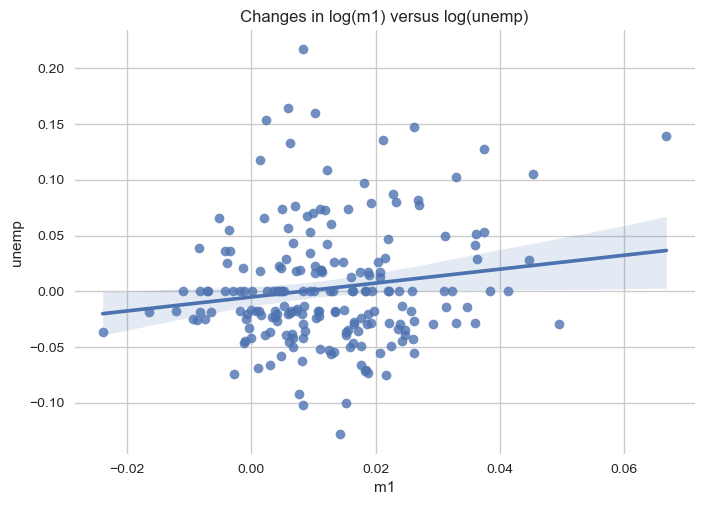

In [41]:
ax = sns.regplot(x="m1", y="unemp", data=trans_data)
ax.set_title("Changes in log(m1) versus log(unemp)");

在探索式数据分析工作中，同时观察一组变量的散布图是很有意义的，这也被称为散布图矩阵（scatter plot matrix）。纯手工创建这样的图表很费工夫，所以seaborn提供了一个便捷的pairplot函数，它支持在对角线上放置每个变量的直方图或密度估计：

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

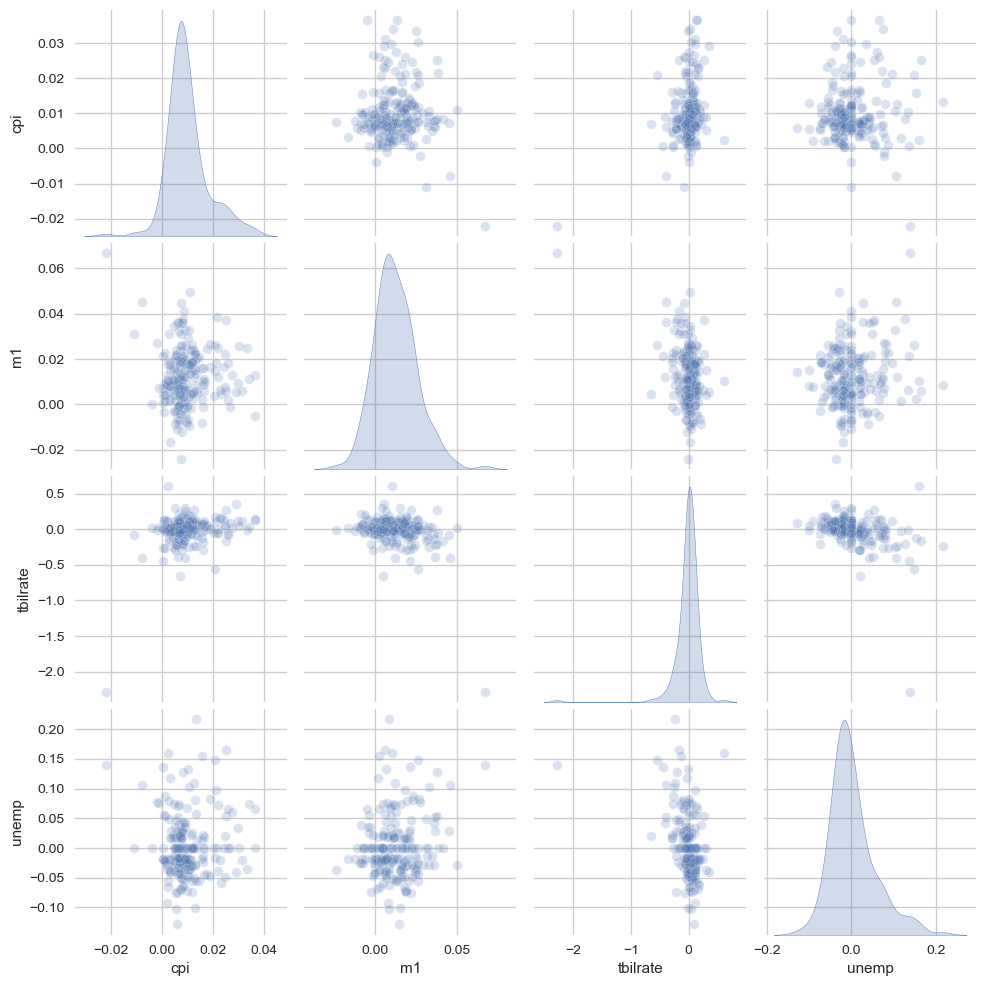

In [42]:
sns.pairplot(trans_data, diag_kind="kde", plot_kws={"alpha": 0.2});

你可能注意到了plot_kws参数。它可以让我们传递配置选项到非对角线元素上的图形使用。对于更详细的配置选项，可以查阅seaborn.pairplot文档字符串。

### 分面网格（facet grid）和类型数据 
要是数据集有额外的分组维度呢？有多个分类变量的数据可视化的一种方法是使用小面网格。seaborn有一个有用的内置函数factorplot，可以简化制作多种分面图:

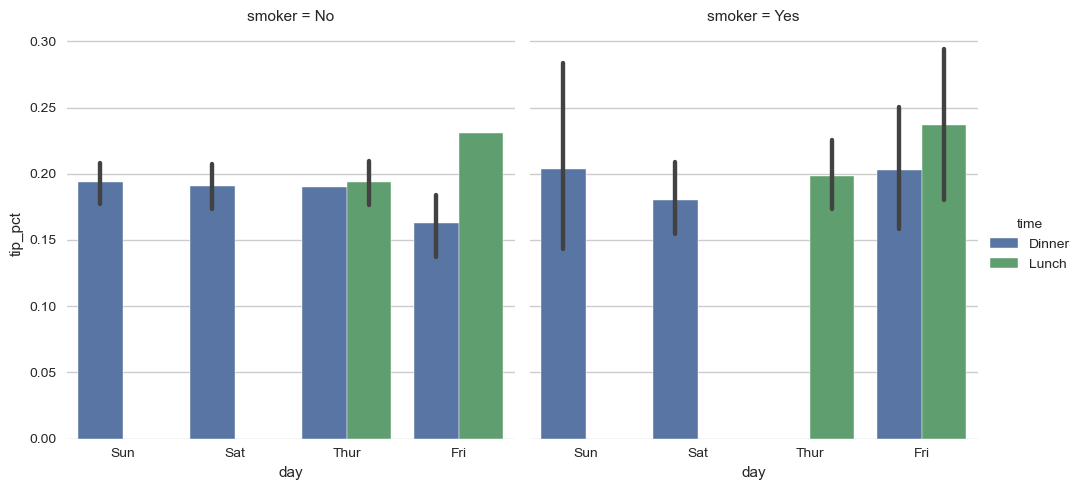

In [43]:
sns.catplot(x="day", y="tip_pct", hue="time", col="smoker",
            kind="bar", data=tips[tips.tip_pct < 1]);

除了在分面中用不同的颜色按时间分组，我们还可以通过给每个时间值添加一行来扩展分面网格：

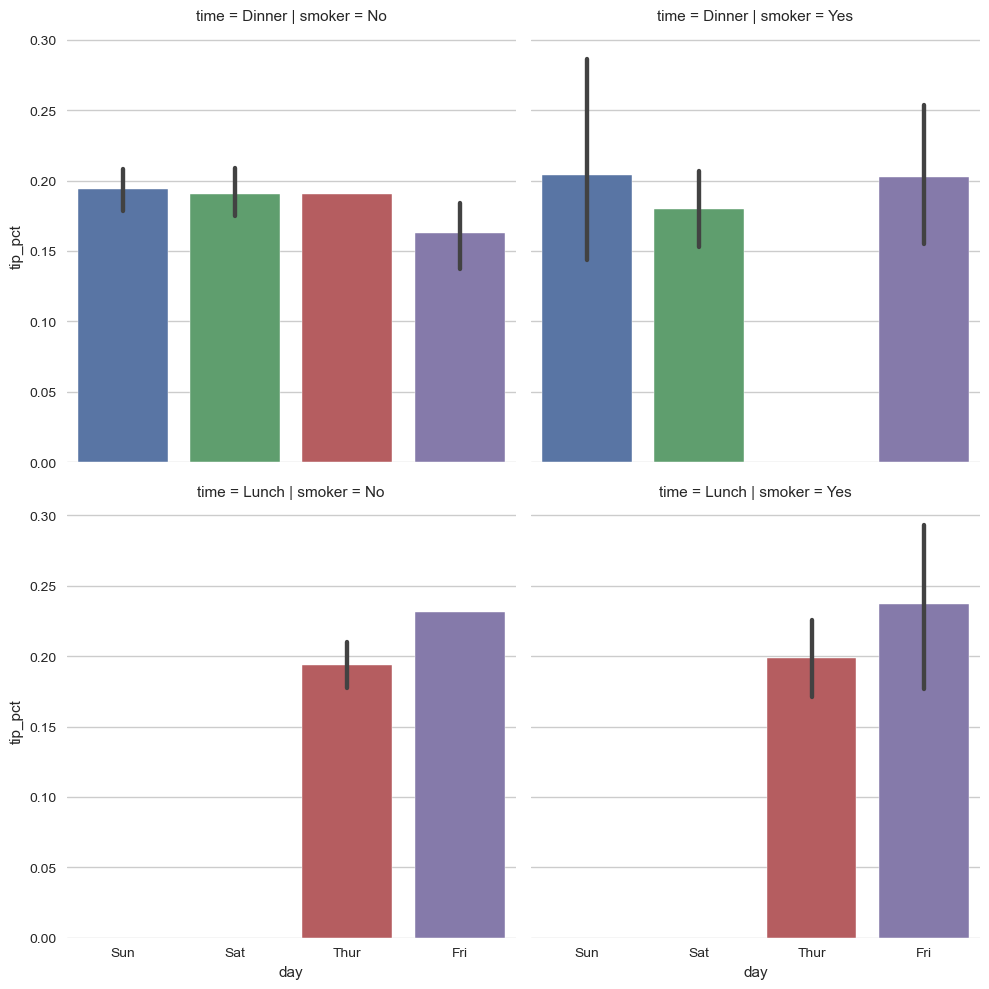

In [44]:
sns.catplot(x="day", y="tip_pct", row="time",
            col="smoker",
            kind="bar", data=tips[tips.tip_pct < 1]);

factorplot支持其它的绘图类型，你可能会用到。例如，箱线图（它可以显示中位数，四分位数，和异常值）就是一个有用的可视化类型:

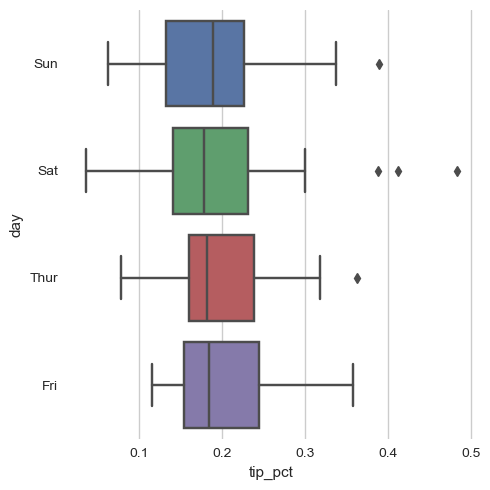

In [45]:
sns.catplot(x="tip_pct", y="day", kind="box",
            data=tips[tips.tip_pct < 0.5]);

### This is the end! :)